In [2]:
from Lib.myModules.my_ML_Modules_1 import *
import math
import sys
import contextlib

In [3]:
# Read all data
data_dir = "../data"
infantNum = 9
ECG_dataset = f"{data_dir}/infant{infantNum}_ecg"
RESP_dataset = f"{data_dir}/infant{infantNum}_resp"

signal_ecg_0 = wfdb.rdsamp(f"{data_dir}/infant{infantNum}_ecg")
signal_resp_0 = wfdb.rdsamp(f"{data_dir}/infant{infantNum}_resp")
print(f'ECG DATA: {signal_ecg_0[1]}')
print(F'RESP DATA: {signal_resp_0[1]}')
totalDuration_ECG = num2Time(num=signal_ecg_0[1]['sig_len'], fs=signal_ecg_0[1]['fs'])
print(f'{totalDuration_ECG} sec, {secs2minutes(totalDuration_ECG)} minutes, {secs2hours(totalDuration_ECG)} hours')
totalDuration_RESP = num2Time(num=signal_resp_0[1]['sig_len'], fs=signal_resp_0[1]['fs'])
print(f'{totalDuration_RESP} sec, {secs2minutes(totalDuration_RESP)} minutes, {secs2hours(totalDuration_RESP)} hours')

ECG DATA: {'fs': 500, 'sig_len': 78684614, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['mV'], 'sig_name': ['II'], 'comments': []}
RESP DATA: {'fs': 50, 'sig_len': 7868296, 'n_sig': 1, 'base_date': None, 'base_time': None, 'units': ['NU'], 'sig_name': ['RESP'], 'comments': []}
157369.228 sec, 2622.8204666666666 minutes, 43.71367444444444 hours
157365.92 sec, 2622.7653333333337 minutes, 43.71275555555556 hours


In [4]:
start_time_secs = hours2secs(10)
end_time_secs = hours2secs(16)

In [5]:
X, y = data_bin(start_time_secs=start_time_secs, 
                end_time_secs=end_time_secs, 
                signal_ecg_0=signal_ecg_0,
                signal_resp_0=signal_resp_0,
                ECG_dataset=ECG_dataset,
                RESP_dataset=RESP_dataset)

start: 18000000, end: 28800000
start: 1800000, end: 2880000
90th percentile: 0.12009164833588916, 10th percentile: -0.15252515920032636, IQR: 0.27261680753621553
Identified outliers: 749430
Data Shape: (10800000,)
90th percentile: 23.16241674523233, 10th percentile: 21.523513824613794, IQR: 1.6389029206185377
Identified outliers: 41671
Data Shape: (1080000,)


In [6]:
y_lr_predict = average_lr_model_predict(X=X,y=y)
y_pr_predict = average_pr_model_predict(X=X,y=y)
y_svr_rbf_predict = average_pr_model_predict(X=X,y=y)

../models/infant_1/lr_model_step0.25_startHrs10_endHrs12.sav
Mean absolute error: 22.38
Mean squared error: 717.06
Root mean squared error: 26.78
../models/infant_2/lr_model_step0.25_startHrs10_endHrs12.sav
Mean absolute error: 9.38
Mean squared error: 315.46
Root mean squared error: 17.76
../models/infant_3/lr_model_step0.25_startHrs10_endHrs12.sav
Mean absolute error: 9.19
Mean squared error: 309.53
Root mean squared error: 17.59
../models/infant_4/lr_model_step0.25_startHrs10_endHrs12.sav
Mean absolute error: 36.29
Mean squared error: 1573.76
Root mean squared error: 39.67
../models/infant_5/lr_model_step0.25_startHrs10_endHrs12.sav
Mean absolute error: 28.37
Mean squared error: 1038.93
Root mean squared error: 32.23
../models/infant_6/lr_model_step0.25_startHrs10_endHrs12.sav
Mean absolute error: 9.60
Mean squared error: 308.39
Root mean squared error: 17.56
../models/infant_7/lr_model_step0.25_startHrs10_endHrs12.sav
Mean absolute error: 28.69
Mean squared error: 1055.05
Root mean

Text(0.5, 1.0, 'Support Vector Regression')

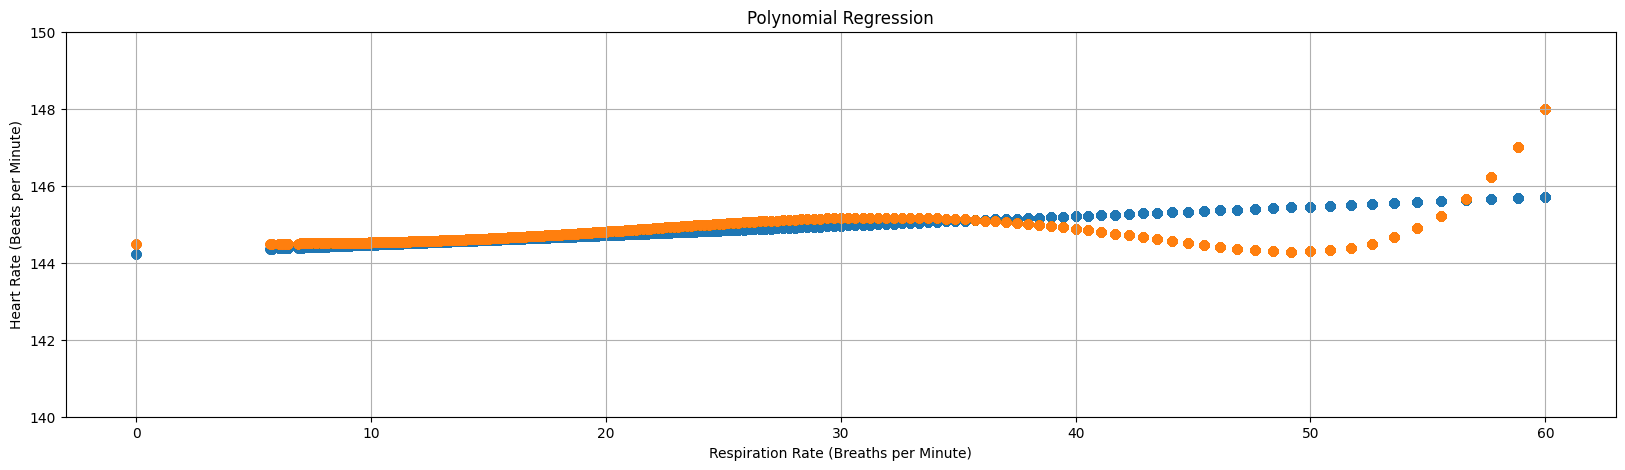

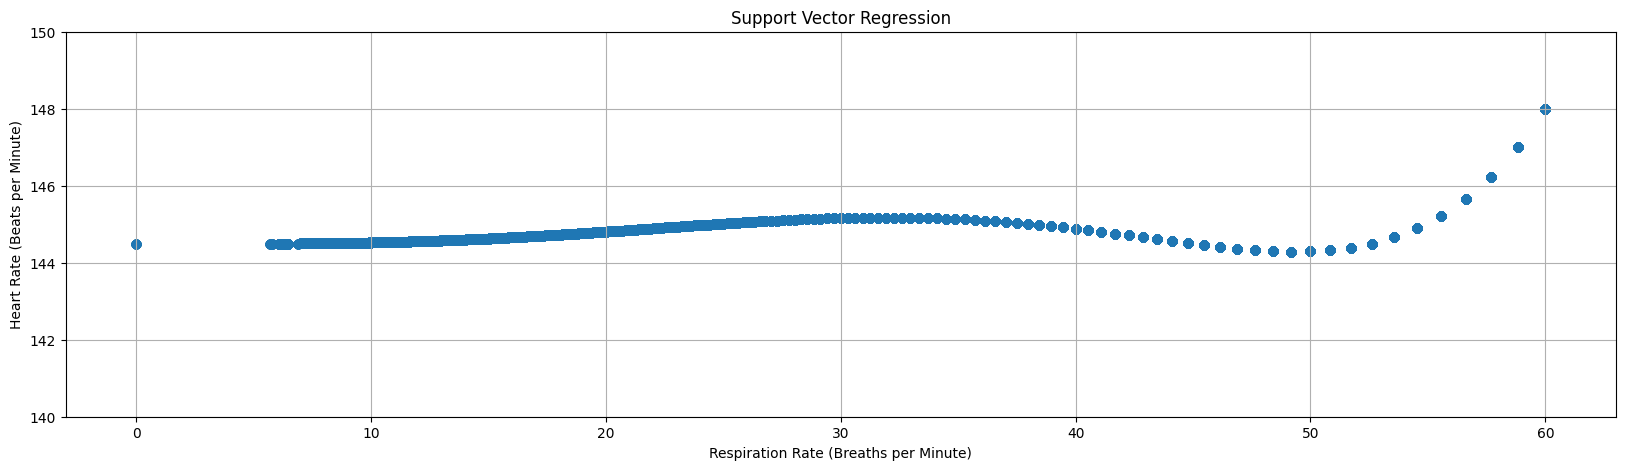

In [7]:
plt.figure(num=2, figsize=(20,5))
plt.scatter(X, y_lr_predict)
plt.ylim(140,150)
plt.grid(True)
plt.xlabel('Respiration Rate (Breaths per Minute)')
plt.ylabel('Heart Rate (Beats per Minute)')
plt.title('Linear Regression')

plt.figure(num=2, figsize=(20,5))
plt.scatter(X, y_pr_predict)
plt.ylim(140,150)
plt.grid(True)
plt.xlabel('Respiration Rate (Breaths per Minute)')
plt.ylabel('Heart Rate (Beats per Minute)')
plt.title('Polynomial Regression')

plt.figure(num=3, figsize=(20,5))
plt.scatter(X, y_svr_rbf_predict)
plt.ylim(140,150)
plt.grid(True)
plt.xlabel('Respiration Rate (Breaths per Minute)')
plt.ylabel('Heart Rate (Beats per Minute)')
plt.title('Support Vector Regression')